In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\Data\company_data.csv')
df.head()

,Company Name,Market Cap,Revenue
0,Microsoft Corporation,"3,142.04B",227.58B
1,Apple Inc,"2,638.25B",385.71B
2,NVIDIA Corporation,"2,314.03B",60.92B
3,Alphabet Inc.,"1,879.86B",307.39B
4,"Amazon.com, Inc.","1,866.72B",574.79B


In [3]:
df.shape

(500, 3)

In [4]:
df.isnull().sum()

Company Name    0
Market Cap      0
Revenue         0
dtype: int64

Having examine the data set this particular row did not have any the reveune entry instead it was filled with a string, I decided to drop it because the data available was enough

In [5]:
df.drop(436, axis=0, inplace=True)

The Market Cap column had a mixture of strings and integers, so cleaned it by removing the string data types

In [6]:
def market_cap_converter(value):
    value = value.replace(',', '')
    if 'B' in value:
        return float(value.replace('B', '')) * 1000000000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    else:
        return float(value)
    
df['Market Cap'] = df['Market Cap'].apply(market_cap_converter)

The Revenue column had a mixture of strings and integers, so cleaned it by removing the string data types

In [7]:
df.head()
def revenue_converter(values):
    if 'B' in values:
        return float(values.replace('B', '')) * 1000000000
    elif 'M' in values:
        return float(values.replace('M', '')) * 1000000
    else:
        return float(values)
    
df['Revenue'] = df['Revenue'].apply(revenue_converter)

In [8]:
df.dtypes

Company Name     object
Market Cap      float64
Revenue         float64
dtype: object

In [9]:
df.describe()

,Market Cap,Revenue
count,4.990000e+02,4.990000e+02
mean,1.115935e+11,4.042310e+10
std,2.600748e+11,6.953733e+10
min,2.187000e+10,3.948000e+07
25%,3.226000e+10,8.490000e+09
50%,5.158000e+10,1.821000e+10
75%,9.541000e+10,3.835500e+10
max,3.142040e+12,6.481300e+11


In [10]:
df.describe(include='object')

,Company Name
count,499
unique,496
top,Petróleo Brasileiro S.A. - Petrobras
freq,2


Below are the 10 companies with with largest market share or market capitalization the largest company with market cap was Microsoft Corporation with $3.14 trillion

In [11]:
top_market_cap_company = df.groupby('Company Name')['Market Cap'].sum().reset_index()
top_market_cap_company = top_market_cap_company.sort_values('Market Cap', ascending=False)
top_market_cap_company.head(10)

,Company Name,Market Cap
287,Microsoft Corporation,3.142040e+12
38,Apple Inc,2.638250e+12
301,NVIDIA Corporation,2.314030e+12
20,Alphabet Inc.,1.879860e+12
22,"Amazon.com, Inc.",1.866720e+12
282,"Meta Platforms, Inc.",1.282400e+12
68,Berkshire Hathaway Inc.,8.916700e+11
167,Eli Lilly and Company,7.350800e+11
407,Taiwan Semiconductor Manufacturing Company Lim...,7.230200e+11
79,Broadcom Inc.,6.263500e+11


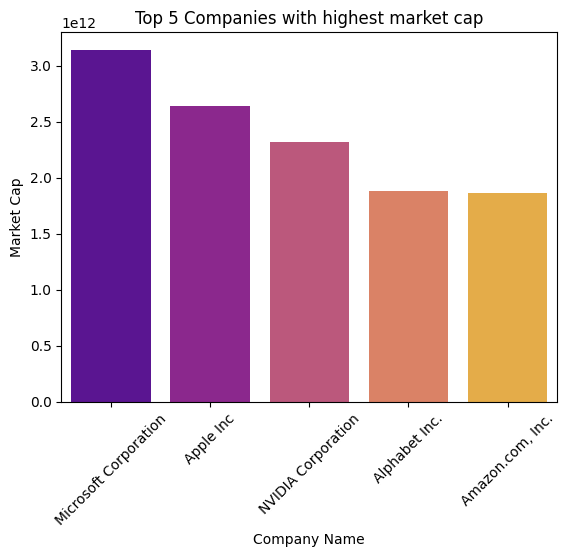

In [12]:
top_5_companies_market_cap = top_market_cap_company.head(5)
sns.barplot(x='Company Name', y='Market Cap', data=top_5_companies_market_cap, palette='plasma', hue='Company Name')
plt.title('Top 5 Companies with highest market cap')
plt.xticks(rotation=45)
plt.show()

There is a moderate positive correlation between market cap and revenue. As market capitaliztion increases revenue also increases but not perfectly as there are other factors that affect them that are not captured in this dataset

In [13]:
correlation = df['Market Cap'].corr(df['Revenue'])
correlation

np.float64(0.5057555287036912)

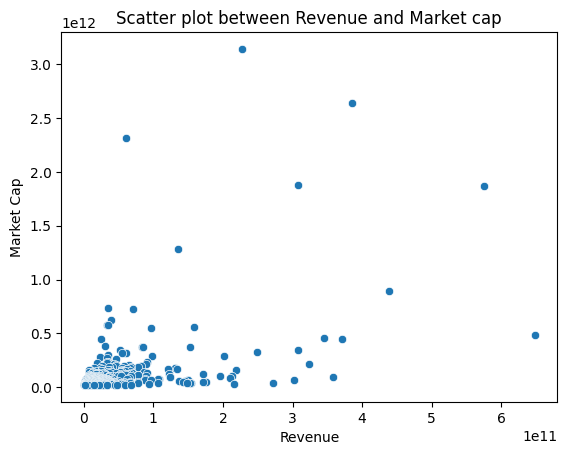

In [14]:
sns.scatterplot(x='Revenue', y='Market Cap', data=df)
plt.title('Scatter plot between Revenue and Market cap')
plt.show()

Below are 10 companies with low market cap and a relatively higher revenue, this may suggest that these companies could be undervalued, presenting the opportunity for growth and investment

In [15]:
df.sort_values(by=['Market Cap', 'Revenue'],ascending=True|False).head(10)

,Company Name,Market Cap,Revenue
499,Franco-Nevada Corporation,2.187000e+10,1.220000e+09
498,Rogers Communications Inc.,2.188000e+10,1.452000e+10
497,STERIS plc,2.189000e+10,5.410000e+09
496,BioNTech SE,2.198000e+10,4.240000e+09
495,Entergy Corporation,2.198000e+10,1.215000e+10
494,FirstEnergy Corp.,2.204000e+10,1.287000e+10
493,ArcelorMittal S.A.,2.207000e+10,6.828000e+10
492,"Alexandria Real Estate Equities, Inc.",2.212000e+10,2.890000e+09
491,Hubbell Incorporated,2.217000e+10,5.370000e+09
490,W. R. Berkley Corporation,2.220000e+10,1.214000e+10


In [16]:
def market_cap_segmentation(value):
    if value < 50000000000:
        return 'small cap'
    elif 50000000000 <= value < 500000000000:
        return 'mid cap'
    else:
        return 'large cap'
    
df['market cap segment'] = df['Market Cap'].apply(market_cap_segmentation)

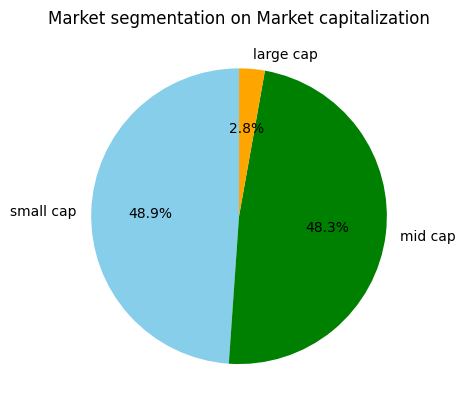

In [17]:
segment_count = df['market cap segment'].value_counts()
plt.pie(segment_count, labels=segment_count.index, autopct='%1.1f%%', startangle=90,colors=['skyblue', 'green', 'orange'])
plt.title("Market segmentation on Market capitalization")
plt.show()

In [18]:
df.head()

,Company Name,Market Cap,Revenue,market cap segment
0,Microsoft Corporation,3.142040e+12,2.275800e+11,large cap
1,Apple Inc,2.638250e+12,3.857100e+11,large cap
2,NVIDIA Corporation,2.314030e+12,6.092000e+10,large cap
3,Alphabet Inc.,1.879860e+12,3.073900e+11,large cap
4,"Amazon.com, Inc.",1.866720e+12,5.747900e+11,large cap


These are the top 10 companies with the highest revenue generated, Walmart Inc. topped the list with $683.13 Billion

In [19]:
top_revenue_companies = df.groupby('Company Name')['Revenue'].sum().reset_index()
top_revenue_companies = top_revenue_companies.sort_values(by='Revenue', ascending=False)
top_revenue_companies.head(10)

,Company Name,Revenue
476,Walmart Inc.,6.481300e+11
22,"Amazon.com, Inc.",5.747900e+11
68,Berkshire Hathaway Inc.,4.393400e+11
38,Apple Inc,3.857100e+11
460,UnitedHealth Group Incorporated,3.716200e+11
90,CVS Health Corporation,3.577800e+11
180,Exxon Mobil Corporation,3.445800e+11
383,Shell plc,3.231800e+11
445,Toyota Motor Corporation,3.082700e+11
20,Alphabet Inc.,3.073900e+11


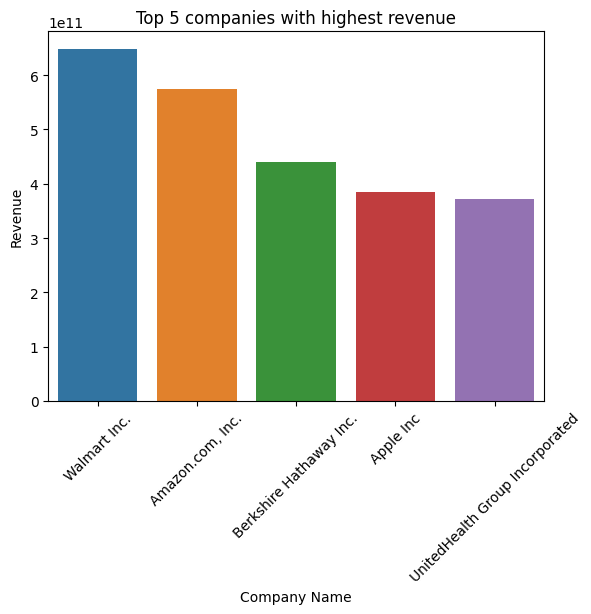

In [20]:
top_5_companies_revenue = top_revenue_companies.head(5)
sns.barplot(x='Company Name', y='Revenue', data=top_5_companies_revenue, hue='Company Name')
plt.title('Top 5 companies with highest revenue')
plt.xticks(rotation=45)
plt.show()

Below are the total revenue generated by the 3 major segments of the market. Companies with the larg market cap generated the most revenue

In [21]:
segment_revenue = df.groupby('market cap segment')['Revenue'].sum().reset_index()
segment_revenue

,market cap segment,Revenue
0,large cap,2.596600e+12
1,mid cap,1.288214e+13
2,small cap,4.692386e+12


Below are 10 companies with high revenue to market cap ration, this may imply that the companies could have been undervalued making it a potential investment opportunity, or they have high revenue efficiency and it is generating substantial revenue compared to its size. 

In [22]:
df['Revenue to market cap ratio'] = df['Revenue'] / df['Market Cap']
efficiency = df.filter(['Company Name', 'Revenue to market cap ratio'])
efficiency = efficiency.sort_values(by='Revenue to market cap ratio', ascending=False)
efficiency.head(10)

,Company Name,Revenue to market cap ratio
422,"Cardinal Health, Inc.",8.005556
333,Cencora,7.050363
183,McKesson Corporation,4.308517
310,Centene Corporation,3.712633
311,"JD.com, Inc.",3.688042
319,The Kroger Co.,3.662949
122,CVS Health Corporation,3.610657
251,Ford Motor Company,3.437183
252,General Motors Company,3.410200
493,ArcelorMittal S.A.,3.093792
